# 深度学习图解 Grokking Deep Learning

目录
+ 第六章 反向传播
    - 在能手写3层神经网络之前，不要继续下一章节
+ 第七章 可视化网络
+ 第八章 学习信号，忽略噪声
    - 提前停止
    - 正则化
        - dropout法:随机关闭一部分节点
        - 批量梯度下降法，一次处理batch_size个取delta平均值保证方向靠谱，放大alpha不超过batch_size倍保证步长。
+ 第九章 激活函数
    - 标准隐藏层激活函数：
        - sigmoid
        - tanh，对于隐藏层，优于前者，tanh需要更窄的初始化(-0.01,0.01)
    - 标准输出层激活函数
        - softmax
    - 将输出转化为斜率（导数），用神经元层在正向传播时的output计算导数
+ 第十章 卷积神经网络(复用权重)
    - 防止过拟合的策略
        - 正则化（不是最理想的技术）
        - 松散定义的模型，或者说网络结构。最著名且最广泛采用的网络结构叫做卷积，当做一层使用时叫卷积层。
    - 一个卷积层通常包含很多卷积核。
        - 每个小神经元层都称为卷积核 kernel。
        - 实际上是一个很小的线性层。接收少于25个输入，并作为单一输出。
    - 8x8图片，经过4个3x3卷积核，得到4个6x6预测矩阵。
        - 求和池化、平均池化、最大池化
    - 卷积层堆叠可以很深（运行也很慢！），就是“深度学习”。(但是，除了更费时，我并没有发现验证集准确度的提升！？)
    - **补充亮点**： 自己的手写体数字识别

# chapter6 反向传播

In [7]:
#numpy建立神经网络
# input: 信号灯，output 是否通行
import numpy as np
street_lights=np.array([
    [1,0,1],
    [0,1,1],
    [0,0,1],
    [1,1,1],
    [0,1,1,],
    [1,0,1]
]);

walk_vs_stop=np.array([0,1,0,1,1,0]);

#
inPut=street_lights[0]# 信号灯 1 0 1
goal=walk_vs_stop[0]

weights=np.array([0.5,0.48,-0.7]);
alpha=0.1

for i in range(100):
    print("---%d\nWeights:"%i, weights)
    pred=inPut.dot(weights)
    error=(pred-goal)**2
    delta=pred-goal
    weights = weights - (delta*inPut)*alpha
    
    print("Error:", error)
    print("Prediction:", pred)
    
    if error<1e-7:
        break;

---0
Weights: [ 0.5   0.48 -0.7 ]
Error: 0.03999999999999998
Prediction: -0.19999999999999996
---1
Weights: [ 0.52  0.48 -0.68]
Error: 0.025599999999999973
Prediction: -0.15999999999999992
---2
Weights: [ 0.536  0.48  -0.664]
Error: 0.01638399999999997
Prediction: -0.1279999999999999
---3
Weights: [ 0.5488  0.48   -0.6512]
Error: 0.010485759999999964
Prediction: -0.10239999999999982
---4
Weights: [ 0.55904  0.48    -0.64096]
Error: 0.006710886399999962
Prediction: -0.08191999999999977
---5
Weights: [ 0.567232  0.48     -0.632768]
Error: 0.004294967295999976
Prediction: -0.06553599999999982
---6
Weights: [ 0.5737856  0.48      -0.6262144]
Error: 0.002748779069439994
Prediction: -0.05242879999999994
---7
Weights: [ 0.57902848  0.48       -0.62097152]
Error: 0.0017592186044416036
Prediction: -0.04194304000000004
---8
Weights: [ 0.58322278  0.48       -0.61677722]
Error: 0.0011258999068426293
Prediction: -0.03355443200000008
---9
Weights: [ 0.58657823  0.48       -0.61342177]
Error: 0.0007

## 学习整个数据集

### 随机梯度下降(每个训练用例都更新权重)

In [20]:
# 输入整个数据集，训练
# input: 3个信号灯，output 是否通行 2个结果
import numpy as np
street_lights=np.array([
    [1,0,1],
    [0,1,1],
    [0,0,1],
    [1,1,1],
    [0,1,1,],
    [1,0,1]
]);

walk_vs_stop=np.array([0,1,0,1,1,0]);

# 初始权重，和设定的alpha值
weights=np.array([0.5,0.48,-0.7]);
alpha=0.1

for i in range(100):
    print("---%d\nWeights:"%i, weights)
    error_for_all=0
    #使用所有数据集
    for row_index in range(len(street_lights)):
        inPut=street_lights[row_index] # 信号灯一行
        goal=walk_vs_stop[row_index] #是否能走
        #
        pred=inPut.dot(weights)
        error=(pred-goal)**2
        error_for_all+=error #全局误差
        
        delta=pred-goal
        weights = weights - (delta*inPut)*alpha

        print(" >>data %d: Error: %0.5f; Prediction: %0.7f" % (row_index, error,pred) )
    print("error_for_all:", error_for_all)
    if error_for_all<1e-5:
        print('Final weights:',weights)
        break;

---0
Weights: [ 0.5   0.48 -0.7 ]
 >>data 0: Error: 0.04000; Prediction: -0.2000000
 >>data 1: Error: 1.44000; Prediction: -0.2000000
 >>data 2: Error: 0.31360; Prediction: -0.5600000
 >>data 3: Error: 0.14746; Prediction: 0.6160000
 >>data 4: Error: 0.68426; Prediction: 0.1728000
 >>data 5: Error: 0.03081; Prediction: 0.1755200
error_for_all: 2.6561231104
---1
Weights: [ 0.540848  0.72112  -0.400432]
 >>data 0: Error: 0.01972; Prediction: 0.1404160
 >>data 1: Error: 0.48074; Prediction: 0.3066464
 >>data 2: Error: 0.11912; Prediction: -0.3451382
 >>data 3: Error: 0.00004; Prediction: 1.0066373
 >>data 4: Error: 0.27196; Prediction: 0.4785035
 >>data 5: Error: 0.07129; Prediction: 0.2670042
error_for_all: 0.9628701776715985
---2
Weights: [ 0.49944225  0.84194128 -0.28583891]
 >>data 0: Error: 0.04563; Prediction: 0.2136033
 >>data 1: Error: 0.21646; Prediction: 0.5347420
 >>data 2: Error: 0.06795; Prediction: -0.2606735
 >>data 3: Error: 0.01741; Prediction: 1.1319429
 >>data 4: Error:

### 完全/平均 梯度下降(对整个训练集计算平均weight_delta后再更新权重，不是每个用例都更新)

In [30]:
# 输入整个数据集，训练
# input: 3个信号灯，output 是否通行 2个结果
import numpy as np
street_lights=np.array([
    [1,0,1],
    [0,1,1],
    [0,0,1],
    [1,1,1],
    [0,1,1,],
    [1,0,1]
]);

walk_vs_stop=np.array([0,1,0,1,1,0]);

# 初始权重，和设定的alpha值
weights=np.array([0.5,0.48,-0.7]);
alpha=0.1

for i in range(600):
    print("---%d\nWeights:"%i, weights)
    error_for_all=0
    weights_delta_for_all=0
    
    error_arr=np.array([]);
    pred_arr=np.array([]);
    
    #使用所有数据集
    for row_index in range(len(street_lights)):
        inPut=street_lights[row_index] # 信号灯一行
        goal=walk_vs_stop[row_index] #是否能走
        #
        pred=inPut.dot(weights)
        pred_arr=np.append(pred_arr, pred)
        #
        error=(pred-goal)**2        
        error_arr=np.append(error_arr, error)
        error_for_all+=error #全局误差
        #
        delta=pred-goal
        weights_delta_for_all += delta*inPut;
    
    print(" >>Error:", error_arr )
    print(" >>Prediction:", pred_arr )
        
    print("error_for_all:", error_for_all)
    if error_for_all<6.7e-6:
        print('Final weights:',weights)
        break;
    
    #计算平均 weights_delta
    weights_delta_mean=weights_delta_for_all/len(street_lights);
    weights = weights - weights_delta_mean*alpha #更新权重

---0
Weights: [ 0.5   0.48 -0.7 ]
 >>Error: [0.04   1.4884 0.49   0.5184 1.4884 0.04  ]
 >>Prediction: [-0.2  -0.22 -0.7   0.28 -0.22 -0.2 ]
error_for_all: 4.0652
---1
Weights: [ 0.51866667  0.53266667 -0.629     ]
 >>Error: [0.01217344 1.20194678 0.395641   0.33369878 1.20194678 0.01217344]
 >>Prediction: [-0.11033333 -0.09633333 -0.629       0.42233333 -0.09633333 -0.11033333]
error_for_all: 3.1575802222222222
---2
Weights: [ 0.53197222  0.57883889 -0.56866667]
 >>Error: [0.00134648 0.97975903 0.32338178 0.20963171 0.97975903 0.00134648]
 >>Prediction: [-0.03669444  0.01017222 -0.56866667  0.54214444  0.01017222 -0.03669444]
error_for_all: 2.4952245113580243
---3
Weights: [ 0.5408263   0.61946407 -0.51734056]
 >>Error: [5.51580018e-04 8.06182176e-01 2.67641250e-01 1.27484835e-01
 8.06182176e-01 5.51580018e-04]
 >>Prediction: [ 0.02348574  0.10212352 -0.51734056  0.64294981  0.10212352  0.02348574]
error_for_all: 2.008593597194719
---4
Weights: [ 0.54599427  0.65534413 -0.47362102]
 >

---126
Weights: [ 0.06775721  1.05351853 -0.06789216]
 >>Error: [1.82109529e-08 2.06601259e-04 4.60934505e-03 2.84980649e-03
 2.06601259e-04 1.82109529e-08]
 >>Prediction: [-1.34947964e-04  9.85626369e-01 -6.78921575e-02  1.05338358e+00
  9.85626369e-01 -1.34947964e-04]
error_for_all: 0.007872390482093103
---127
Weights: [ 0.06687198  1.05310792 -0.06716673]
 >>Error: [8.68758417e-08 1.97650055e-04 4.51136943e-03 2.78923140e-03
 1.97650055e-04 8.68758417e-08]
 >>Prediction: [-2.94747081e-04  9.85941193e-01 -6.71667286e-02  1.05281317e+00
  9.85941193e-01 -2.94747081e-04]
error_for_all: 0.0076960746850306535
---128
Weights: [ 0.06600159  1.05269633 -0.06644905]
 >>Error: [2.00224073e-07 1.89137362e-04 4.41547636e-03 2.72994387e-03
 1.89137362e-04 2.00224073e-07]
 >>Prediction: [-4.47464047e-04  9.86247278e-01 -6.64490509e-02  1.05224886e+00
  9.86247278e-01 -4.47464047e-04]
error_for_all: 0.007524095408469429
---129
Weights: [ 0.06514569  1.05228394 -0.06573904]
 >>Error: [3.52068602e-0

 >>Prediction: [-0.00252964  0.99664486 -0.02753752  1.02165274  0.99664486 -0.00252964]
error_for_all: 0.0012624684377568612
---211
Weights: [ 0.02473132  1.02393334 -0.02724328]
 >>Error: [6.30993617e-06 1.09557056e-05 7.42196440e-04 4.58875667e-04
 1.09557056e-05 6.30993617e-06]
 >>Prediction: [-0.00251196  0.99669006 -0.02724328  1.02142138  0.99669006 -0.00251196]
error_for_all: 0.0012356033903836857
---212
Weights: [ 0.02445803  1.02368665 -0.02695219]
 >>Error: [6.22080807e-06 1.06637331e-05 7.26420412e-04 4.49121868e-04
 1.06637331e-05 6.22080807e-06]
 >>Prediction: [-0.00249415  0.99673446 -0.02695219  1.0211925   0.99673446 -0.00249415]
error_for_all: 0.0012093113618329315
---213
Weights: [ 0.02418796  1.02344229 -0.0266642 ]
 >>Error: [6.13176429e-06 1.03807015e-05 7.10979717e-04 4.39575394e-04
 1.03807015e-05 6.13176429e-06]
 >>Prediction: [-0.00247624  0.99677809 -0.0266642   1.02096605  0.99677809 -0.00247624]
error_for_all: 0.001183580042360016
---214
Weights: [ 0.023921

 >>Error: [1.45455733e-06 1.58516360e-06 1.33061573e-04 8.22675979e-05
 1.58516360e-06 1.45455733e-06]
 >>Prediction: [-0.00120605  0.99874097 -0.01153523  1.00907015  0.99874097 -0.00120605]
error_for_all: 0.00022140861313117314
---292
Weights: [ 0.01021821  1.010167   -0.01141198]
 >>Error: [1.42507157e-06 1.54997528e-06 1.30233234e-04 8.05189289e-05
 1.54997528e-06 1.42507157e-06]
 >>Prediction: [-0.00119376  0.99875502 -0.01141198  1.00897323  0.99875502 -0.00119376]
error_for_all: 0.00021670225704900368
---293
Weights: [ 0.01010845  1.01005894 -0.01129004]
 >>Error: [1.39615071e-06 1.51560085e-06 1.27465014e-04 7.88074294e-05
 1.51560085e-06 1.39615071e-06]
 >>Prediction: [-0.00118159  0.9987689  -0.01129004  1.00887735  0.9987689  -0.00118159]
error_for_all: 0.00021209594679145959
---294
Weights: [ 0.00999988  1.00995202 -0.01116941]
 >>Error: [1.36778539e-06 1.48202007e-06 1.24755635e-04 7.71323092e-05
 1.48202007e-06 1.36778539e-06]
 >>Prediction: [-0.00116952  0.99878262 -0.01

error_for_all: 3.642500289368976e-05
---376
Weights: [ 0.00413568  1.00413271 -0.00462878]
 >>Error: [2.43148459e-07 2.46085615e-07 2.14255660e-05 1.32467233e-05
 2.46085615e-07 2.43148459e-07]
 >>Prediction: [-4.93100861e-04  9.99503930e-01 -4.62877587e-03  1.00363960e+00
  9.99503930e-01 -4.93100861e-04]
error_for_all: 3.56507575092083e-05
---377
Weights: [ 0.00409145  1.00408858 -0.00457932]
 >>Error: [2.38012936e-07 2.40821849e-07 2.09701471e-05 1.29651528e-05
 2.40821849e-07 2.38012936e-07]
 >>Prediction: [-4.87865695e-04  9.99509264e-01 -4.57931731e-03  1.00360072e+00
  9.99509264e-01 -4.87865695e-04]
error_for_all: 3.4892969407971015e-05
---378
Weights: [ 0.0040477   1.00404493 -0.00453039]
 >>Error: [2.32985142e-07 2.35671412e-07 2.05244084e-05 1.26895672e-05
 2.35671412e-07 2.32985142e-07]
 >>Prediction: [-4.82685345e-04  9.99514540e-01 -4.53038723e-03  1.00356224e+00
  9.99514540e-01 -4.82685345e-04]
error_for_all: 3.415128877438528e-05
---379
Weights: [ 0.00400442  1.0040017

In [ ]:
# 注意到，中间权重最大，非常接近于1，其他权重可以忽略。就是告诉我们，中间的信号灯决定着是否能通过。
# 神经网络经过很多次迭代后，得出结论: 中间信号灯和是否通行高度相关。

### 批量梯度下降(对确定批次大小n=(8-256)个用例，更新一次权重)

In [32]:
# 介于随机梯度下降和平均梯度下降之间。

#### 权重-压力表，有助于描述每个训练样本对相应权重产生的影响。

```
训练数据            权重压力
1 0 1 >> 0          - 0 - >> 0
0 1 1 >> 1          0 + + >> 1
0 0 1 >> 0          0 0 - >> 0
1 1 1 >> 1          + + + >> 1
0 1 1 >> 1          0 + + >> 1
1 0 1 >> 0          - 0 - >> 0
```

* +表示有向1的压力
* -表示有向0的压力
* 0表示没有压力，因为输入为0，对权重没有影响。
    - 第一行，数据对结果没有相关性，使其权重(1,3)受到向下的压力。
    - 第二行，数据和结果正相关，使其权重(2,3)向上。

* 总体而言
    - 最左边的权重，2个负值一个正值，平均而言，值会趋向于0；
    - 中间三个正值，平均而言会向着1移动。
    - 每个独立权重，都试图纠正误差。
    - 相关性给权重向上(1)的压力，无关性给权重向下（0）的压力。
    - 最终，神经网络能够发现中间的输入的权重最大，和结果最相关。
    
* 边界情况：压力冲突
    - 看权重-压力表最右列，向上、向下的力矩相等。但是网络还是将与之对应的权重降到了0，似乎需要更多向下的压力才行，这是怎么回事？
    - 这组数据的偶然幸运而已。如果不是中间节点如此完美的和结果关联，网络很难压制最右侧节点的权重。
    - 正则化则能够迫使具有压力冲突的权重趋向于0；

* 正则化是有利的。

> 学习的过程，就是以更大的权重奖励相关性。

> 深度学习的最大弱点是: 过拟合。就是error==0训练停止，但是最相关的因素还没有获得最高权重。因为偶然的相关性而停止学习。

> 深度学习的最大挑战：泛化，而不是记忆。

## 反向传播：远程错误归因

In [ ]:
# 非线性：如果节点为负，则将其设置为0。
# 矩阵的乘法，是一种线性变换。如果没有非线性干扰，则对于3层网络，总能找到行为一致的2层网络，后者的权重矩阵是3层的2个权重矩阵的乘积。
# 现在关注，输入层和输出层的相关性！

# 引入中间层，能引入非线性变换。
# 这样，3层比2层具有更强的能力。

In [40]:
## 
import numpy as np
np.random.seed(1)

# 将所有负数设为0
def relu(x):
    return (x>0)*x

alpha=0.2
hidden_size=4

street_lights=np.array([
    [1,0,1],
    [0,1,1,],
    [0,0,1],
    [1,1,1]
])

walk_vs_stop=np.array([1,1,0,0]) #输出层

#随机化产生权重矩阵(记忆：一个output一列)
weights_0_1=2*np.random.random( (3, hidden_size))-1
weights_1_2=2*np.random.random( (hidden_size,1))-1

#
layer_0=street_lights[0]
layer_1= relu( np.dot(layer_0, weights_0_1) )
layer_2=np.dot(layer_1, weights_1_2)

print(layer_0)
print(layer_1)
print(layer_2)

[1 0 1]
[-0.          0.51828245 -0.         -0.        ]
[0.39194327]


In [95]:
## 开始循环遍历
import numpy as np
np.random.seed(1)

# 将所有负数设为0: x>0是返回x；其他返回0；
def relu(x):
    return (x>0)*x

# relu的导数: 当x>0时返回1，其他返回0；
def relu2deriv(x):
    return x>0
#

alpha=0.2
hidden_size=4

street_lights=np.array([
    [1,0,1],
    [0,1,1,],
    [0,0,1],
    [1,1,1]
])

walk_vs_stop=np.array([1,1,0,0]) #输出层

#随机化产生权重矩阵(记忆：一个output一列)
weights_0_1=2*np.random.random( (3, hidden_size))-1
weights_1_2=2*np.random.random( (hidden_size,1))-1

#
for iteration in range(60):
    layer_2_error=0
    for i in range(len(street_lights)):
        # 计算每一层
        layer_0=street_lights[i:i+1]
        layer_1= relu( np.dot(layer_0, weights_0_1) )
        layer_2=np.dot(layer_1, weights_1_2)

        #计算误差
        layer_2_error +=np.sum( (layer_2-walk_vs_stop[i:i+1])**2 )
        
        # 每一层的delta=pred-goal
        layer_2_delta=layer_2-walk_vs_stop[i:i+1]
        # 误差反向传播
        layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
        
        #更新权重
        weights_1_2 -= alpha*layer_1.T.dot(layer_2_delta)
        #eights_1_2
        weights_0_1 -= alpha*layer_0.T.dot(layer_1_delta)
        #weights_0_1
        
    if iteration % 10 ==9:
        print("[%d] Error:" % iteration, layer_2_error);

[9] Error: 0.6342311598444467
[19] Error: 0.35838407676317513
[29] Error: 0.0830183113303298
[39] Error: 0.006467054957103705
[49] Error: 0.0003292669000750734
[59] Error: 1.5055622665134859e-05


In [96]:
print(weights_0_1)
weights_1_2

[[-0.16595599  0.91056768 -0.99977125 -0.90023925]
 [-0.70648822 -0.92794391 -0.62747958  0.89703458]
 [-0.20646505 -0.03308324 -0.16161097  0.00237016]]


array([[-0.5910955 ],
       [ 1.13962134],
       [-0.94522481],
       [ 1.11023793]])

## 挑战： 在凭记忆建立一个三层神经网络之前，不要继续阅读下一个章节！

In [229]:
## 已知条件
import numpy as np
np.random.seed(1)

# 将所有负数设为0: x>0是返回x；其他返回0；
def relu(x):
    return (x>0)*x

# relu的导数: 当x>0时返回1，其他返回0；
def relu2deriv(x):
    return x>0
#

alpha=0.2
hidden_size=4

street_lights=np.array([
    [1,0,1],
    [0,1,1,],
    [0,0,1],
    [1,1,1]
])

walk_vs_stop=np.array([1,1,0,0]) #输出层

#随机化产生权重矩阵(记忆：一个output一列)
weights_0_1=2*np.random.random( (3, hidden_size))-1
weights_1_2=2*np.random.random( (hidden_size,1))-1

#一个输出对应一列
print(weights_0_1) #3行4列
weights_1_2 #4行1列

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]


array([[-0.5910955 ],
       [ 0.75623487],
       [-0.94522481],
       [ 0.34093502]])

In [230]:
#凭记忆建立3层神经网络

#每一个观测值都更新权重，随机梯度下降法
for num in range(200):
    layer2_error=0
    #print("="*10, num)
    #对一套观测值进行循环，并给出layer2总误差
    for i in range(len(street_lights)):
        #(1)更新预测结果
        layer0=street_lights[i:i+1]
        layer1=relu( np.dot(layer0, weights_0_1) )
        layer2=np.dot(layer1, weights_1_2)
        
        #(2)计算误差
        layer2_error+=np.sum( (layer2-walk_vs_stop[i:i+1])**2 )
        
        #(3)layer2计算delta
        layer2_delta= layer2-walk_vs_stop[i:i+1]
        #print(i, layer2_delta) #一个元素的数组 [[0]]
        
        #变动归因到layer1: layer2变动 乘以 权重矩阵，回溯一次
        layer1_delta=layer2_delta*weights_1_2.T
        #print(i, layer1_delta) #[[ 0.3594196  -0.45983371  0.57475031 -0.20730783]]
        # 还要考虑，如果中间层layer1输入为0，则应该对误差无贡献，则不调整权重。relu函数的导数(x>0返回1，否则返回0)
        layer1_delta *= relu2deriv(layer1) #layer1 #array([[-0., -0., -0., -0.]])
        #print(i, layer1_delta) #[[ 0.         -0.45983371  0.         -0.        ]]
        
        #(4) 更新权重 weight -= delta*input * alpha
        weights_1_2 -= alpha*layer1.T.dot(layer2_delta)
        #print(i, weights_1_2)
        weights_0_1 -= alpha*layer0.T.dot(layer1_delta)
        #print(i, weights_0_1)
    print(num, 'Error:', layer2_error)
    
    #退出机制
    if layer2_error<1e-6:
        break;

0 Error: 1.4142058374213209
1 Error: 1.212716151470694
2 Error: 1.056563760006402
3 Error: 0.9491664812884164
4 Error: 0.8619621154574514
5 Error: 0.784506838338833
6 Error: 0.7146489816005345
7 Error: 0.672866352346484
8 Error: 0.6394999890740327
9 Error: 0.6342311598444467
10 Error: 0.5969764839869187
11 Error: 0.5714302583039846
12 Error: 0.547512509993337
13 Error: 0.5291187885056882
14 Error: 0.5202827123839309
15 Error: 0.4854443591208563
16 Error: 0.4804341717307572
17 Error: 0.42548955696355173
18 Error: 0.3905776418458242
19 Error: 0.35838407676317513
20 Error: 0.32618123814841266
21 Error: 0.29395962452752294
22 Error: 0.26209322300616295
23 Error: 0.23101665519210007
24 Error: 0.20117243143357702
25 Error: 0.17298316510384884
26 Error: 0.14682342054830255
27 Error: 0.12299256341197361
28 Error: 0.10169306031259193
29 Error: 0.0830183113303298
30 Error: 0.06695238635188576
31 Error: 0.05338152682500647
32 Error: 0.042114772619092876
33 Error: 0.03290944387911881
34 Error: 0.0

In [227]:
#凭记忆建立3层神经网络

#所有观测值更新一次权重，平均梯度下降法（失败）


#################
## 已知条件
#################
import numpy as np
np.random.seed(1)

# 将所有负数设为0: x>0是返回x；其他返回0；
def relu(x):
    return (x>0)*x

# relu的导数: 当x>0时返回1，其他返回0；
def relu2deriv(x):
    return x>0
#

alpha=0.2
hidden_size=4

street_lights=np.array([
    [1,0,1],
    [0,1,1,],
    [0,0,1],
    [1,1,1]
])

walk_vs_stop=np.array([1,1,0,0]) #输出层

#随机化产生权重矩阵(记忆：一个output一列)
weights_0_1=2*np.random.random( (3, hidden_size))-1
weights_1_2=2*np.random.random( (hidden_size,1))-1

#一个输出对应一列
#print(weights_0_1) #3行4列
#weights_1_2 #4行1列


#################
# 平均梯度下降法
#################
for num in range(2):
    layer2_error=0
    print("="*10, num)
    
    #对一套观测值进行循环，并给出layer2总误差
    weights_1_2_delta_arr=np.zeros([hidden_size,1])
    for i in range(len(street_lights)):
        #(1)更新预测结果
        layer0=street_lights[i:i+1]
        layer1=relu( np.dot(layer0, weights_0_1) )
        layer2=np.dot(layer1, weights_1_2)
        
        #(2)计算误差
        layer2_error+=np.sum( (layer2-walk_vs_stop[i:i+1])**2 )
        
        #(3)layer2计算delta
        #layer2_delta= layer2-walk_vs_stop[i:i+1]
        #print(i, layer2_delta) #一个元素的数组 [[0]]
        
        w_delta= layer1.T*(layer2-walk_vs_stop[i:i+1])
        #print(">", w_delta)
        weights_1_2_delta_arr += w_delta
    
    # 求平均delta
    #print(">>>", weights_1_2_delta_arr)
    layer2_delta = np.sum(layer1_delta_arr)/layer1_delta_arr.size
    
    #变动归因到layer1: layer2变动 乘以 权重矩阵
    layer1_delta=layer2_delta*weights_1_2.T * relu2deriv(layer1) ### 这里要用layer1，是不是无法使用平均梯度下降？

    #(4) 更新权重 weight -= delta*input * alpha
    weights_1_2 -= alpha*layer1.T.dot(layer2_delta)
    #print(i, weights_1_2)
    weights_0_1 -= alpha*layer0.T.dot(layer1_delta)
    #print(i, weights_0_1)
    
    print(num, 'Error:', layer2_error)
    
    #退出机制
    if layer2_error<1e-6:
        break;

========== 0
0 Error: 1.3624240251748887
========== 1
1 Error: 1.3624240251748887


# Chapter 7 如何描绘神经网络：在脑海里，在白纸上

l1=relu(l0W0)
l2=l1W1

总体 l2=relu(l0W0)W1

# Chapter 8 学习信号，忽略噪声：正则化和批处理介绍

In [302]:
## 获取手写体数字数据集：包括训练集、测试集

import sys, numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#数据大小
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

print(x_train.shape, x_test.shape) #训练集有6万张图片，每个图片28*28像素；

60000 60000
10000 10000
(60000, 28, 28) (10000, 28, 28)


In [238]:
x_train.size

47040000

In [251]:
#取前1000张图像，二维变成一维，一行是一个图像。
images=x_train[0:1000].reshape(1000, 28*28)/255
images.shape #(1000, 784)

(1000, 784)

In [264]:
#标签
labels=y_train[0:1000]
labels.shape

(1000,)

In [265]:
labels[0:10] #每个图片的标签，数字0-9

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [266]:
## 标签变矩阵
one_hot_labels=np.zeros([ len(labels), 10])

for i,l in enumerate(labels):
    one_hot_labels[i][l]=1 #第i行第l列标记为1，一行是一个结果标签

labels=one_hot_labels

In [267]:
## 同理，处理测试集
test_images=x_test.reshape(len(x_test), 28*28)/255

test_labels=np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l]=1

## 可视化图片

pic [2]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 1


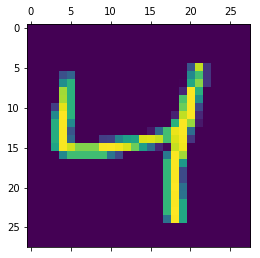

pic [1]: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2


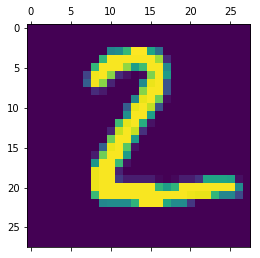

In [308]:
import matplotlib.pyplot as plt

#展示训练集的标签和图片矩阵
def showPic(i):
    print('pic [%d]:'%i, labels[i], np.argmax(test_labels[i]))
    plt.matshow( images[i].reshape([28,28]) )
    plt.show()
#test
showPic(2)

#展示测试集的标签和图片矩阵
def showPicTest(i):
    print('pic [%d]:'%i, test_labels[i], np.argmax(test_labels[i]))
    plt.matshow( test_images[i].reshape([28,28]) )
    plt.show()
#test
showPicTest(1)

## 手写体数字识别

In [330]:
# 基本三层网络
import time
start=time.time()

relu=lambda x: (x>0)*x #x>0时返回x，否则返回0
relu2deriv=lambda x:x>0; #x>0时返回1，否则返回0

# 初始化条件
alpha=0.01
iterations=450
hidden_size=40 #隐藏层节点数目
pixels_per_image=784 #input一个图像,是28*28长度的向量
num_labels=10 #output是0-9标签的概率

#初始化权重, 矩阵行列维度分别由input和output确定
np.random.seed(1)
weights_0_1=0.2*np.random.random((pixels_per_image, hidden_size))-0.1
weights_1_2=0.2*np.random.random((hidden_size, num_labels))-0.1

#开始拟合
for j in range(iterations):
    error=0.0
    correct_cnt=0
    
    #对于每张图片，求中间层和输出层
    for i in range(len(images)):
        layer_0=images[i:i+1]
        layer_1=relu(np.dot(layer_0, weights_0_1))
        layer_2=np.dot(layer_1, weights_1_2)
        #
        error += np.sum( (layer_2 - labels[i:i+1])**2 )
        correct_cnt += int( np.argmax(layer_2) == np.argmax(labels[i:i+1]) )
        #
        layer_2_delta = layer_2-labels[i:i+1]
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        #
        weights_1_2 -= alpha*layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha*layer_0.T.dot(layer_1_delta)
        
    sys.stdout.write("\n" + \
                     " I:"+str(j) + \
                     " Error:"+str( error/ float(len(images)))[0:6] +\
                     " Correct:"+str( correct_cnt/float(len(images))) +\
                     " Time: %0.2f" % (time.time()-start )
                    )
    #防止过拟合
    if correct_cnt==float(len(images)):
        break;


 I:0 Error:0.6361 Correct:0.612 Time: 0.2548336982727051
 I:1 Error:0.4076 Correct:0.8 Time: 0.5156853199005127
 I:2 Error:0.3199 Correct:0.868 Time: 0.7835321426391602
 I:3 Error:0.2665 Correct:0.905 Time: 1.050379753112793
 I:4 Error:0.2307 Correct:0.919 Time: 1.32322359085083
 I:5 Error:0.2038 Correct:0.933 Time: 1.5830748081207275
 I:6 Error:0.1829 Correct:0.944 Time: 1.842926263809204
 I:7 Error:0.1667 Correct:0.951 Time: 2.1117725372314453
 I:8 Error:0.1535 Correct:0.957 Time: 2.3776214122772217
 I:9 Error:0.1429 Correct:0.968 Time: 2.631485939025879
 I:10 Error:0.1339 Correct:0.972 Time: 2.8983230590820312
 I:11 Error:0.1260 Correct:0.977 Time: 3.157175064086914
 I:12 Error:0.1193 Correct:0.976 Time: 3.4280200004577637
 I:13 Error:0.1130 Correct:0.98 Time: 3.6908695697784424
 I:14 Error:0.1070 Correct:0.984 Time: 3.956716775894165
 I:15 Error:0.1020 Correct:0.986 Time: 4.220566511154175
 I:16 Error:0.0970 Correct:0.99 Time: 4.478419065475464
 I:17 Error:0.0928 Correct:0.991 Tim

In [314]:
correct_cnt

1000

In [332]:
# 测试集上
wrong_arr=[]
#j=140
if( j % 10==0 or j==(iterations-1) ):
    error=0.0
    correct_cnt=0
    
    for i in range(len(test_images)):
        layer_0=test_images[i:i+1]
        layer_1=relu(np.dot(layer_0, weights_0_1))
        layer_2=np.dot(layer_1, weights_1_2)
        
        #
        error += np.sum( (layer_2 - test_labels[i:i+1])**2 )
        compare=np.argmax(layer_2) == np.argmax(test_labels[i:i+1])
        correct_cnt += int(compare)
        #
        if not compare:
            wrong_arr.append(i)
        
    sys.stdout.write("\nTest-error:"+str(error/float(len(test_images)))[0:5] +\
                    "\tTest-Acc:"+str( correct_cnt/float(len(test_images))) )
##
#训练450步: Test-error:0.359	Test-Acc:0.8319
#训练136步: Test-error:0.335	Test-Acc:0.8434


Test-error:0.335	Test-Acc:0.8434

1566
pic [22]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 6


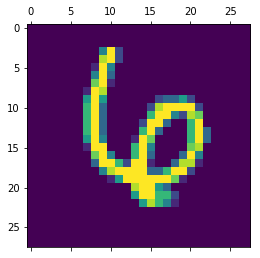

In [336]:
# 目测错误部分。有些感觉不应该错
print(len(wrong_arr))
showPicTest(wrong_arr[3])

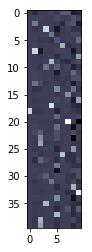

In [345]:
plt.imshow(weights_1_2, cmap = 'bone')

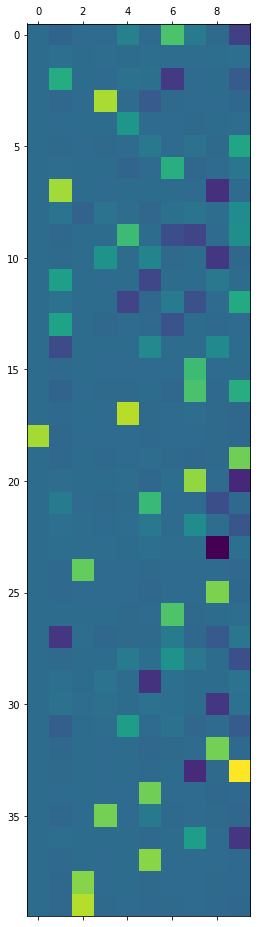

In [328]:
# 权重矩阵可视化。 好像没啥收获
plt.matshow( weights_1_2 )
plt.show()

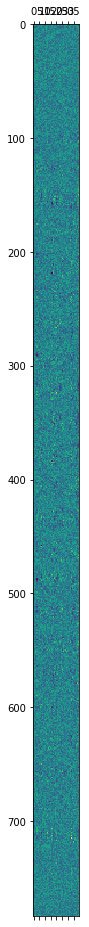

In [329]:
plt.matshow( weights_0_1  )
plt.show()

## 随着训练次数的增加，训练集错误率在降低，但是测试集错误率先下降后上升

In [342]:
#汇总以上代码

# 基本三层网络。每10次迭代训练 测试一次。
import time
start=time.time()

relu=lambda x: (x>0)*x #x>0时返回x，否则返回0
relu2deriv=lambda x:x>0; #x>0时返回1，否则返回0

# 初始化条件
alpha=0.005
iterations=350
hidden_size=40 #隐藏层节点数目
pixels_per_image=784 #input一个图像,是28*28长度的向量
num_labels=10 #output是0-9标签的概率

#初始化权重, 矩阵行列维度分别由input和output确定
np.random.seed(1)
weights_0_1=0.2*np.random.random((pixels_per_image, hidden_size))-0.1
weights_1_2=0.2*np.random.random((hidden_size, num_labels))-0.1

## 记录误差大小
train_num=[]
train_error=[]
test_error=[]

#开始训练
for j in range(iterations):
    error=0.0
    correct_cnt=0
    
    #对于每张图片，训练
    for i in range(len(images)):
        layer_0=images[i:i+1]
        layer_1=relu(np.dot(layer_0, weights_0_1))
        layer_2=np.dot(layer_1, weights_1_2)
        #
        error += np.sum( (layer_2 - labels[i:i+1])**2 )
        correct_cnt += int( np.argmax(layer_2) == np.argmax(labels[i:i+1]) )
        #
        layer_2_delta = layer_2-labels[i:i+1]
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        #
        weights_1_2 -= alpha*layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha*layer_0.T.dot(layer_1_delta)

    # 每迭代10次训练，在验证集上验证
    if( j % 10==0 or j==(iterations-1) ):
        error2=0.0
        correct_cnt2=0

        for i2 in range(len(test_images)):
            layer_0=test_images[i2:i2+1]
            layer_1=relu(np.dot(layer_0, weights_0_1))
            layer_2=np.dot(layer_1, weights_1_2)

            #
            error2 += np.sum( (layer_2 - test_labels[i2:i2+1])**2 )
            correct_cnt2 += int(np.argmax(layer_2) == np.argmax(test_labels[i2:i2+1]))
        
        #记录error，方便后续画图
        train_num.append(j)
        train_error.append( error/ float(len(images)) )
        test_error.append( error2/float(len(test_images)) )
        #测试后，输出报告
        sys.stdout.write("\n I:"+str(j) + \

                         " Train-Error:"+str( error/ float(len(images)))[0:6] +\
                         " Train-Correct:"+str( correct_cnt/float(len(images))) +\

                         " Test-error:"+str(error2/float(len(test_images)))[0:5] +\
                         " Test-Acc:"+str( correct_cnt2/float(len(test_images))) +\
                         " Time: %0.2f" % (time.time()-start )  )
# 125 seconds


 I:0 Train-Error:0.7294 Train-Correct:0.527 Test-error:0.593 Test-Acc:0.6493 Time: 1.24
 I:10 Train-Error:0.1981 Train-Correct:0.94 Test-error:0.321 Test-Acc:0.8559 Time: 4.77
 I:20 Train-Error:0.1261 Train-Correct:0.972 Test-error:0.293 Test-Acc:0.8638 Time: 8.37
 I:30 Train-Error:0.0919 Train-Correct:0.991 Test-error:0.291 Test-Acc:0.8614 Time: 11.94
 I:40 Train-Error:0.0715 Train-Correct:0.994 Test-error:0.295 Test-Acc:0.86 Time: 15.44
 I:50 Train-Error:0.0577 Train-Correct:0.995 Test-error:0.299 Test-Acc:0.8584 Time: 18.96
 I:60 Train-Error:0.0477 Train-Correct:0.997 Test-error:0.304 Test-Acc:0.8571 Time: 22.50
 I:70 Train-Error:0.0404 Train-Correct:0.998 Test-error:0.307 Test-Acc:0.8555 Time: 25.99
 I:80 Train-Error:0.0346 Train-Correct:0.998 Test-error:0.311 Test-Acc:0.8524 Time: 29.55
 I:90 Train-Error:0.0300 Train-Correct:0.998 Test-error:0.314 Test-Acc:0.8513 Time: 33.06
 I:100 Train-Error:0.0263 Train-Correct:0.998 Test-error:0.318 Test-Acc:0.8505 Time: 36.56
 I:110 Train-Er

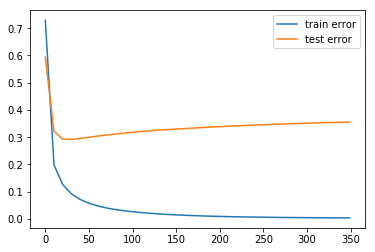

In [349]:
#绘制训练和测试错误曲线
import matplotlib.pyplot as plt

plt.plot(train_num, train_error, label="train error")
plt.plot(train_num, test_error, label="test error")

plt.legend() #默认的参数

plt.show()

> 训练20次时，验证集准确度达到86.38%，继续训练迭代，验证机准确度开始下降。

> 过拟合，就是学习到了噪音，而不是真实信号。太多细节就是噪音。提前停止可忽略噪音。

### 提前停止，或者使用小网络可以避免过拟合。

- 提前停止，就是一边迭代训练，一边在验证集上检测准确度
- 小网络表现力差，不能抓住更多细节，只能捕获那些更大、更明显、更高级特性的空间。
    - 怎么综合获得小网络抗拒过拟合的能力，以及大网络丰富的表达能力？构建很多隐藏层节点，并随机关闭其中的节点。
    - 随机网络总是随机初始化的，这点很重要！他们学习过程中是先信号，再噪音的。而且每个学习的噪音不同。
    - 如果很多随机的神经元，它们倾向于捕获不同的噪音和相似的信号。
    - 每个犯错的方向不同，整合(ensemble)在一起时，误差往往互相抵消，展示出共有的东西：信号。

## 增加dropout的代码


 I:0 Train-Error:0.9029 Train-Correct:0.395 Test-error:0.638 Test-Acc:0.6325 	Time: 1.57
 I:10 Train-Error:0.3923 Train-Correct:0.819 Test-error:0.371 Test-Acc:0.8314 	Time: 7.63
 I:20 Train-Error:0.3207 Train-Correct:0.884 Test-error:0.316 Test-Acc:0.8551 	Time: 13.71
 I:30 Train-Error:0.2765 Train-Correct:0.918 Test-error:0.307 Test-Acc:0.8661 	Time: 19.84
 I:40 Train-Error:0.2592 Train-Correct:0.931 Test-error:0.293 Test-Acc:0.8721 	Time: 25.81
 I:50 Train-Error:0.2345 Train-Correct:0.94 Test-error:0.281 Test-Acc:0.8749 	Time: 31.71
 I:60 Train-Error:0.2296 Train-Correct:0.957 Test-error:0.290 Test-Acc:0.8791 	Time: 37.53
 I:70 Train-Error:0.2261 Train-Correct:0.958 Test-error:0.295 Test-Acc:0.8758 	Time: 43.33
 I:80 Train-Error:0.2105 Train-Correct:0.961 Test-error:0.290 Test-Acc:0.8782 	Time: 49.15
 I:90 Train-Error:0.2043 Train-Correct:0.95 Test-error:0.285 Test-Acc:0.8809 	Time: 54.96
 I:100 Train-Error:0.1920 Train-Correct:0.97 Test-error:0.277 Test-Acc:0.8808 	Time: 60.76
 I:

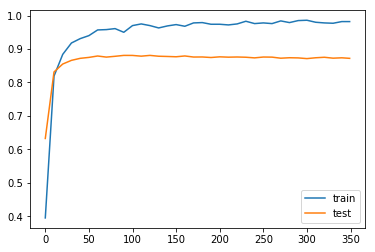

In [403]:
#v1 基本三层网络。每10次迭代训练 测试一次。
#v2 增加dropout，也就是中间层在训练的时候随机把50%设置为0，则剩下的部分信号要放大到原来的 1/0.5=2倍，才能保证layer2接收到相同强度的输入。


import time
start=time.time()

relu=lambda x: (x>0)*x #x>0时返回x，否则返回0
relu2deriv=lambda x:x>0; #x>0时返回1，否则返回0

# 初始化条件
alpha=0.005
iterations=350
hidden_size=100 #隐藏层节点数目
pixels_per_image=784 #input一个图像,是28*28长度的向量
num_labels=10 #output是0-9标签的概率

#初始化权重, 矩阵行列维度分别由input和output确定
np.random.seed(1)
weights_0_1=0.2*np.random.random((pixels_per_image, hidden_size))-0.1
weights_1_2=0.2*np.random.random((hidden_size, num_labels))-0.1

## 记录误差大小
train_num=[]
train_correct=[]
test_correct=[]

#开始训练
for j in range(iterations):
    error=0.0
    correct_cnt=0
    
    #对于每张图片，训练
    for i in range(len(images)):
        layer_0=images[i:i+1]
        layer_1=relu(np.dot(layer_0, weights_0_1))
        
        #################### 新增 1/3 行
        dropout_mask=np.random.randint(2, size=layer_1.shape)
        #################### 新增 2/3 行
        layer_1 *= dropout_mask*2
        
        layer_2=np.dot(layer_1, weights_1_2)
        #
        error += np.sum( (layer_2 - labels[i:i+1])**2 )
        correct_cnt += int( np.argmax(layer_2) == np.argmax(labels[i:i+1]) )
        #
        layer_2_delta = layer_2-labels[i:i+1]
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        
        #################### 新增 3/3 行
        layer_1_delta *= dropout_mask
        
        #
        weights_1_2 -= alpha*layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha*layer_0.T.dot(layer_1_delta)

    # 每迭代10次训练，在验证集上验证
    if( j % 10==0 or j==(iterations-1) ):
        error2=0.0
        correct_cnt2=0

        for i in range(len(test_images)):
            layer_0=test_images[i:i+1]
            layer_1=relu(np.dot(layer_0, weights_0_1))
            layer_2=np.dot(layer_1, weights_1_2)

            #
            error2 += np.sum( (layer_2 - test_labels[i:i+1])**2 )
            correct_cnt2 += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        
        #记录准确程度，方便后续画图
        train_num.append(j)
        train_correct.append( correct_cnt/ float(len(images)) )
        test_correct.append( correct_cnt2/float(len(test_images)) )
        #测试后，输出报告
        sys.stdout.write("\n" + \
                         " I:"+str(j) + \

                         " Train-Error:"+str( error/ float(len(images)))[0:6] +\
                         " Train-Correct:"+str( correct_cnt/float(len(images))) +\

                         " Test-error:"+str(error2/float(len(test_images)))[0:5] +\
                         " Test-Acc:"+str( correct_cnt2/float(len(test_images))) +\
                         " \tTime: %0.2f" % (time.time()-start )  )
# 209 seconds

#绘制训练和测试错误曲线
import matplotlib.pyplot as plt

plt.plot(train_num, train_correct, label="train")
plt.plot(train_num, test_correct, label="test")

plt.legend() #默认的参数

plt.show()

> 带dropout的神经网络，验证集正确率，峰值出现在90次时的 0.8809，训练结束，下降的也不那么多

## 批量梯度下降


 I:0 Train-Error:1.2764 Train-Correct:0.153 Test-error:0.825 Test-Acc:0.3747 	Time: 1.18
 I:10 Train-Error:0.5829 Train-Correct:0.66 Test-error:0.544 Test-Acc:0.7255 	Time: 2.64
 I:20 Train-Error:0.4948 Train-Correct:0.752 Test-error:0.464 Test-Acc:0.7739 	Time: 4.02
 I:30 Train-Error:0.4432 Train-Correct:0.793 Test-error:0.418 Test-Acc:0.8054 	Time: 5.31
 I:40 Train-Error:0.4108 Train-Correct:0.806 Test-error:0.389 Test-Acc:0.8195 	Time: 6.59
 I:50 Train-Error:0.3858 Train-Correct:0.836 Test-error:0.365 Test-Acc:0.8324 	Time: 7.94
 I:60 Train-Error:0.3632 Train-Correct:0.842 Test-error:0.351 Test-Acc:0.8429 	Time: 9.23
 I:70 Train-Error:0.3441 Train-Correct:0.865 Test-error:0.340 Test-Acc:0.8499 	Time: 10.52
 I:80 Train-Error:0.3330 Train-Correct:0.859 Test-error:0.330 Test-Acc:0.8543 	Time: 11.85
 I:90 Train-Error:0.3190 Train-Correct:0.883 Test-error:0.324 Test-Acc:0.8595 	Time: 13.15
 I:100 Train-Error:0.3053 Train-Correct:0.897 Test-error:0.316 Test-Acc:0.8647 	Time: 14.46
 I:110

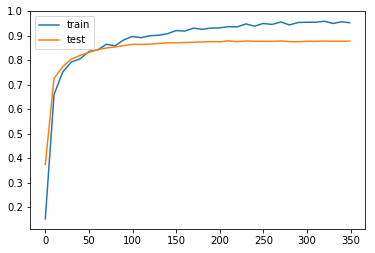

In [408]:
#v1 基本三层网络。每10次迭代训练 测试一次。
#v2 增加dropout，也就是中间层在训练的时候随机把50%设置为0，则剩下的部分信号要放大到原来的 1/0.5=2倍，才能保证layer2接收到相同强度的输入。
#v3 批量梯度下降法。每100个更新一次权重


import time
start=time.time()

relu=lambda x: (x>0)*x #x>0时返回x，否则返回0
relu2deriv=lambda x:x>0; #x>0时返回1，否则返回0

# init
batch_size=100

alpha= 0.1 #0.005 * (batch_size/5)
iterations=350
hidden_size=100 #隐藏层节点数目
pixels_per_image=784 #input一个图像,是28*28长度的向量
num_labels=10 #output是0-9标签的概率

#初始化权重, 矩阵行列维度分别由input和output确定
np.random.seed(1)
weights_0_1=0.2*np.random.random((pixels_per_image, hidden_size))-0.1
weights_1_2=0.2*np.random.random((hidden_size, num_labels))-0.1

## for plot
train_num=[]
train_correct=[]
test_correct=[]

for j in range(iterations):
    error=0.0
    correct_cnt=0
    
    for i in range( int( len(images)/batch_size) ):
        #####v3 新增
        batch_start = i*batch_size
        batch_end = (i+1)*batch_size
        #
        layer_0=images[batch_start:batch_end] #批量获取100个图片
        layer_1=relu(np.dot(layer_0, weights_0_1))
        
        dropout_mask=np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask*2
        
        layer_2=np.dot(layer_1, weights_1_2)
        
        # log
        error += np.sum( (layer_2 - labels[batch_start:batch_end])**2 )
        for k in range(batch_size):
            correct_cnt += int( np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]) )
        ##注释：书中下面5行缩进到for循环了，我感觉是错的。
        layer_2_delta = (layer_2-labels[batch_start:batch_end] ) / batch_size #这里对100个图片，除以100，其实变动还是1。
        #这是调整方向可能更准确了。方向和距离，都要照顾到。
        #为了保持调整的距离，只好增大alpha值。又不能增加的太大，一般增大倍数不超过batch_size
        
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 -= alpha*layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha*layer_0.T.dot(layer_1_delta)

    # validation dataset
    if( j % 10==0 or j==(iterations-1) ):
        error2=0.0
        correct_cnt2=0

        for i in range(len(test_images)):
            layer_0=test_images[i:i+1]
            layer_1=relu(np.dot(layer_0, weights_0_1))
            layer_2=np.dot(layer_1, weights_1_2)

            #
            error2 += np.sum( (layer_2 - test_labels[i:i+1])**2 )
            correct_cnt2 += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        
        #for plot later
        train_num.append(j)
        train_correct.append( correct_cnt/ float(len(images)) )
        test_correct.append( correct_cnt2/float(len(test_images)) )
        #validation reports
        sys.stdout.write("\n" + \
                         " I:"+str(j) + \

                         " Train-Error:"+str( error/ float(len(images)))[0:6] +\
                         " Train-Correct:"+str( correct_cnt/float(len(images))) +\

                         " Test-error:"+str(error2/float(len(test_images)))[0:5] +\
                         " Test-Acc:"+str( correct_cnt2/float(len(test_images))) +\
                         " \tTime: %0.2f" % (time.time()-start )  )
# 52 seconds

#plot
import matplotlib.pyplot as plt

plt.plot(train_num, train_correct, label="train")
plt.plot(train_num, test_correct, label="test")

plt.legend() #默认的参数

plt.show()

# Chapter 9 激活函数

> 激活函数，就是应用到某一层神经元上的函数。我们已经用过的relu函数，具有将负数变为0的效果

+ 必须满足一些性质的函数，才能作为激活函数。
    - 接受一个数字，返回一个数字。
    - 约束1：函数必须连续且定义域是无穷的。例如：定义域是几个线段的函数，不符合该条件。
    - 约束2：好的激活函数是单调的，不会改变方向。例如：二次函数不符合该条件。
        * 解释：凸优化与非凸优化。许多大学有专门针对这类问题的课程
    - 约束3：好的激活函数是非线性的(扭转或反转)
    - 约束4：合适的激活函数（及其导数）应该可以高效计算
    

## 标准隐藏层激活函数

### (1)基础激活函数：sigmoid 函数 y=1/(1+exp(-x))

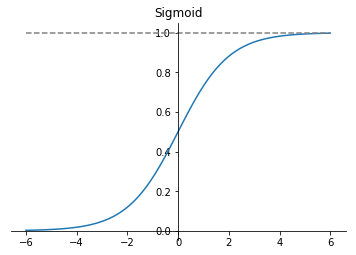

In [423]:
# 基础激活函数：sigmoid 函数 y=1/(1+exp(x))，值域是(0,1)
# 优势：把无穷大平滑的压缩到(0,1),适合于把输出解释为一个概率。

import numpy as np
X=np.linspace(-6,6,100)
Y=1/(1+np.exp(-X))

import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.title('Sigmoid')
plt.plot([-6,6], [1,1], '--', color="grey") #参考线

# gca=get current axis
ax=plt.gca();

# 获得图片的4个边框
ax.spines['right'].set_color('none') #右边的框消失掉了
ax.spines['top'].set_color('none') #上边的框消失掉了

ax.xaxis.set_ticks_position('bottom') #设置x轴为底边
ax.yaxis.set_ticks_position('left') #y轴为左边

#移动坐标轴
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.show()

### (2)对于隐藏层来说，tanh函数 y=( exp(x) - exp(-x) ) / ( exp(x) + exp(-x) )

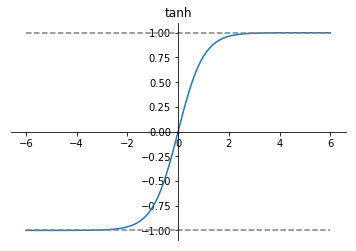

In [426]:
# 对于隐藏层来说，tanh函数 y=( exp(x) - exp(-x) ) / ( exp(x) + exp(-x) )，值域是(-1,1)
# 优势：把无穷大平滑的压缩到(-1,1),还保留有负数部分

import numpy as np
X=np.linspace(-6,6,100)
Y=(np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.title('tanh')

plt.plot([-6,6], [1,1], '--', color="grey") #参考线
plt.plot([-6,6], [-1,-1], '--', color="grey") #参考线

# gca=get current axis
ax=plt.gca();

# 获得图片的4个边框
ax.spines['right'].set_color('none') #右边的框消失掉了
ax.spines['top'].set_color('none') #上边的框消失掉了

ax.xaxis.set_ticks_position('bottom') #设置x轴为底边
ax.yaxis.set_ticks_position('left') #y轴为左边

#移动坐标轴
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.show()

> 对隐藏层，tanh比sigmoid有优势。因为它还保留负的相关性信息。

## 标准输出层激活函数

输出层主要有三种类型
- 类型1：预测原始数据值(没有激活函数)。例：根据周围省份温度，预测该省份温度。不是在(0,1)或者(-1,1)之间
- 类型2: 预测不相关的是与否的概率(sigmoid)
- 类型3：预测哪一个的概率(softmax)


## 输入进行softmax

1. 对于输入值(v1,v2,...,vn)，先计算每个值的指数形式 exp(Vi)
    - 然后所有负数都变成很小的正数。原本正数变成很大的正数。
2. 求和
3. 每个指数值除以该和

性质：每个元素的softmax之和为1；
softmax增强了信号衰减的锐度，孤立网络以非常高的概率预测某项输出。

softmax的优点：神经网络对一个值预测的越高，它对其他值的预测越低。

调优：使用大于或小于e的底数。数值越大衰减越大，越小衰减越小。

> 术语： 某一层的输入，是指使用非线性函数之前的值。

> layer1的输入是 np.dot(layer0, weights_0_1)。请不要和前一层 layer0相混淆

## 加入其它激活函数的MNIST数据集学习


 I:0 Train-Correct:0.48 Test-Acc:0.6273 	Time: 0.89
 I:10 Train-Correct:0.88 Test-Acc:0.8368 	Time: 2.00
 I:20 Train-Correct:0.919 Test-Acc:0.8613 	Time: 3.06
 I:30 Train-Correct:0.951 Test-Acc:0.8691 	Time: 4.10
 I:40 Train-Correct:0.944 Test-Acc:0.8747 	Time: 5.14
 I:50 Train-Correct:0.957 Test-Acc:0.8783 	Time: 6.16
 I:60 Train-Correct:0.948 Test-Acc:0.8753 	Time: 7.19
 I:70 Train-Correct:0.952 Test-Acc:0.8814 	Time: 8.22
 I:80 Train-Correct:0.941 Test-Acc:0.8806 	Time: 9.25
 I:90 Train-Correct:0.948 Test-Acc:0.8809 	Time: 10.30
 I:100 Train-Correct:0.934 Test-Acc:0.8842 	Time: 11.35
 I:110 Train-Correct:0.909 Test-Acc:0.8828 	Time: 12.39
 I:120 Train-Correct:0.876 Test-Acc:0.8619 	Time: 13.44
 I:130 Train-Correct:0.719 Test-Acc:0.8186 	Time: 14.49
 I:140 Train-Correct:0.113 Test-Acc:0.1036 	Time: 15.50
 I:150 Train-Correct:0.089 Test-Acc:0.1028 	Time: 16.51
 I:160 Train-Correct:0.094 Test-Acc:0.1028 	Time: 17.50
 I:170 Train-Correct:0.1 Test-Acc:0.1028 	Time: 18.50
 I:180 Train-Co

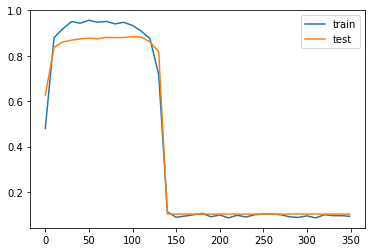

max(test_correct)= 0.8842


In [454]:
#v1 基本三层网络。每10次迭代训练 测试一次。
#v2 增加dropout，也就是中间层在训练的时候随机把50%设置为0，则剩下的部分信号要放大到原来的 1/0.5=2倍，才能保证layer2接收到相同强度的输入。
#v3 批量梯度下降法。每100个更新一次权重
#v4 使用tanh激活函数
import numpy as np, sys
np.random.seed(1)

import time
start=time.time()


##tanh 激活函数
def tanh(x):
    return np.tanh(x)
## 其导数
def tanh2deriv(output):
    return 1-(output**2)

def softmax(x):
    temp=np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

# init
batch_size=100

alpha= 0.2  #0.005 * (batch_size/5)=0.1
iterations=350
hidden_size=100 #隐藏层节点数目
pixels_per_image=784 #input一个图像,是28*28长度的向量
num_labels=10 #output是0-9标签的概率

#随机初始化权重, 矩阵行列维度分别由input和output确定
weights_0_1=0.02*np.random.random((pixels_per_image, hidden_size))-0.01 #只有tanh激活函数喜欢更窄的初始化范围(-0.01,0.01)
weights_1_2=0.2*np.random.random((hidden_size, num_labels))-0.1 #范围(-0.1, 0.1)

## for plot
train_num=[]
train_correct=[]
test_correct=[]

for j in range(iterations):
    #error=0.0
    correct_cnt=0
    
    for i in range( int( len(images)/batch_size) ):
        batch_start = i*batch_size
        batch_end = (i+1)*batch_size
        #
        layer_0=images[batch_start:batch_end] #批量获取100个图片
        layer_1=tanh(np.dot(layer_0, weights_0_1))
        
        dropout_mask=np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask*2
        
        layer_2=softmax( np.dot(layer_1, weights_1_2) ) #对outut使用softmax函数
        #layer_2= np.dot(layer_1, weights_1_2) #不用softmax，验证集最高达到0.8087，使用后能达到0.87
        
        # log
        #error += np.sum( (layer_2 - labels[batch_start:batch_end])**2 )
        for k in range(batch_size):
            correct_cnt += int( np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]) )

        layer_2_delta = (layer_2-labels[batch_start:batch_end] ) / batch_size
        
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 -= alpha*layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha*layer_0.T.dot(layer_1_delta)

    # validation dataset
    if( j % 10==0 or j==(iterations-1) ):
        #error2=0.0
        correct_cnt2=0

        for i in range(len(test_images)):
            layer_0=test_images[i:i+1]
            layer_1=tanh(np.dot(layer_0, weights_0_1)) #验证集也适用tanh激活函数
            layer_2=np.dot(layer_1, weights_1_2) #验证集输出不再使用softmax

            #error2 += np.sum( (layer_2 - test_labels[i:i+1])**2 )
            correct_cnt2 += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        
        #for plot later
        train_num.append(j)
        train_correct.append( correct_cnt/ float(len(images)) )
        test_correct.append( correct_cnt2/float(len(test_images)) )
        #validation reports
        sys.stdout.write("\n" + \
                         " I:"+str(j) + \

                         #" Train-Error:"+str( error/ float(len(images)))[0:6] +\
                         " Train-Correct:"+str( correct_cnt/float(len(images))) +\

                         #" Test-error:"+str(error2/float(len(test_images)))[0:5] +\
                         " Test-Acc:"+str( correct_cnt2/float(len(test_images))) +\
                         " \tTime: %0.2f" % (time.time()-start )  )
# 36 seconds

#plot
import matplotlib.pyplot as plt

plt.plot(train_num, train_correct, label="train")
plt.plot(train_num, test_correct, label="test")

plt.legend() #默认的参数

plt.show()

#
print('max(test_correct)=',max(test_correct))

# 不同的alpha值，验证集最好的结果
# alpha=0.02  I:340 Train-Correct:0.952 Test-Acc:0.8731 	Time: 36.56
# alpha=0.05  I:349 Train-Correct:0.959 Test-Acc:0.8821 	Time: 37.89
# alpha=0.08  I:270 Train-Correct:0.942 Test-Acc:0.8846 	Time: 29.42
# alpha=0.1   I:220 Train-Correct:0.948 Test-Acc:0.8854 	Time: 24.12
# alpha=0.2   I:100 Train-Correct:0.934 Test-Acc:0.8842 	Time: 11.35

> 使用tanh激活函数，alpha=0.05 时，经过340次迭代，验证集最高达到 0.8731

# chapter 10 卷积神经网络:关于边和角的学习(复用权重)

一个卷积层包含多个卷积核kernel。

每个卷积核都有输出，对这些输出进行 求和池化、平均池化、最大化池化等得到最终矩阵，传播到下一层。

8x8input，经过4个3x3卷积核，获得4个6x6的输出矩阵。

In [525]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [538]:
## 从一批图片中选取子区域
def get_image_selection(layer, row_from, row_to, col_from, col_to):
    sub_section=layer[:, row_from:row_to, col_from:col_to]
    return sub_section.reshape(-1,1,row_to-row_from, col_to-col_from)

In [542]:
sb=x_train[1:5, 5:7, 16:19]
print(sb.shape) #(4, 2, 3) 4个图，每个子图取出2行3列
sb

(4, 2, 3)


array([[[252, 252, 252],
        [252, 239, 233]],

       [[  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 124],
        [  0,  96, 244]],

       [[  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)

In [543]:
sb=sb.reshape(-1,1, 2,3) #新增一个维度，后面用来合并的
print(sb.shape) #(4, 1, 2, 3) 
sb

(4, 1, 2, 3)


array([[[[252, 252, 252],
         [252, 239, 233]]],


       [[[  0,   0,   0],
         [  0,   0,   0]]],


       [[[  0,   0, 124],
         [  0,  96, 244]]],


       [[[  0,   0,   0],
         [  0,   0,   0]]]], dtype=uint8)

In [544]:
#第二个位置 做切片，获得子图
sb2=x_train[1:5, 6:8, 13:16]
sb2=sb2.reshape(-1,1, 2,3)
sb2

array([[[[ 54, 227, 253],
         [224, 252, 253]]],


       [[[  0,   0,   0],
         [  0,   0,   0]]],


       [[[  0,   0,   0],
         [  0,   0,   0]]],


       [[[  0,   0,   0],
         [148, 210, 253]]]], dtype=uint8)

In [545]:
#第3个位置 做切片，获得子图
sb3=x_train[1:5, 17:19, 15:18]
sb3=sb3.reshape(-1,1, 2,3)
sb3

array([[[[  0,   0,   7],
         [  0,  48, 165]]],


       [[[  0,   0, 169],
         [  0,   0, 169]]],


       [[[  0,   0,   0],
         [  0,   0,   0]]],


       [[[253, 109,   0],
         [252,  21,   0]]]], dtype=uint8)

In [546]:
sb3.shape #4幅图，1新增维度，2行3列

(4, 1, 2, 3)

In [527]:
#放到一个list中
s=list()
s.append(sb)
s.append(sb2)
s.append(sb3)
s

[array([[[[252, 252, 252],
          [252, 239, 233]]],
 
 
        [[[  0,   0,   0],
          [  0,   0,   0]]],
 
 
        [[[  0,   0, 124],
          [  0,  96, 244]]],
 
 
        [[[  0,   0,   0],
          [  0,   0,   0]]]], dtype=uint8), array([[[[ 54, 227, 253],
          [224, 252, 253]]],
 
 
        [[[  0,   0,   0],
          [  0,   0,   0]]],
 
 
        [[[  0,   0,   0],
          [  0,   0,   0]]],
 
 
        [[[  0,   0,   0],
          [148, 210, 253]]]], dtype=uint8), array([[[[  0,   0,   7],
          [  0,  48, 165]]],
 
 
        [[[  0,   0, 169],
          [  0,   0, 169]]],
 
 
        [[[  0,   0,   0],
          [  0,   0,   0]]],
 
 
        [[[253, 109,   0],
          [252,  21,   0]]]], dtype=uint8)]

In [547]:
#按照新增维度连接
ei=np.concatenate(s, axis=1) 

es=ei.shape
print(es) #(4, 3, 2, 3) #4个图（一批次），新增维度有3个不同位置的子图，每个子图2行3列

ei

(4, 3, 2, 3)


array([[[[252, 252, 252],
         [252, 239, 233]],

        [[ 54, 227, 253],
         [224, 252, 253]],

        [[  0,   0,   7],
         [  0,  48, 165]]],


       [[[  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0, 169],
         [  0,   0, 169]]],


       [[[  0,   0, 124],
         [  0,  96, 244]],

        [[  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0]]],


       [[[  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [148, 210, 253]],

        [[253, 109,   0],
         [252,  21,   0]]]], dtype=uint8)

### 4个图

In [531]:
ei[0] #第0图，3个切片，2行3列

array([[[252, 252, 252],
        [252, 239, 233]],

       [[ 54, 227, 253],
        [224, 252, 253]],

       [[  0,   0,   7],
        [  0,  48, 165]]], dtype=uint8)

In [532]:
ei[1] #第1图，3个切片，2行3列

array([[[  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 169],
        [  0,   0, 169]]], dtype=uint8)

In [537]:
#重塑成2维的，第n个图*切片个数 作为第一维度。
# 长度是剩下2个维度乘积，也就是2行*3列=6个数字
# 第0图 切片0
# 第0图 切片1
# 第0图 切片2
#
# 第1图 切片0

fi=ei.reshape(es[0]*es[1],-1)
fi

array([[252, 252, 252, 252, 239, 233],
       [ 54, 227, 253, 224, 252, 253],
       [  0,   0,   7,   0,  48, 165],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0, 169,   0,   0, 169],
       [  0,   0, 124,   0,  96, 244],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 148, 210, 253],
       [253, 109,   0, 252,  21,   0]], dtype=uint8)

In [507]:
fi.shape

(6, 6)

In [548]:
ei.reshape(es[0],-1)

array([[252, 252, 252, 252, 239, 233,  54, 227, 253, 224, 252, 253,   0,
          0,   7,   0,  48, 165],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 169,   0,   0, 169],
       [  0,   0, 124,   0,  96, 244,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 148, 210, 253, 253,
        109,   0, 252,  21,   0]], dtype=uint8)

## 加入卷积层后的MNIST预测


 I:0 Train-Correct:0.075 Test-Acc:0.0643 	Time: 21.42
 I:10 Train-Correct:0.169 Test-Acc:0.2907 	Time: 52.26
 I:20 Train-Correct:0.032 Test-Acc:0.0144 	Time: 82.29
 I:30 Train-Correct:0.327 Test-Acc:0.5636 	Time: 113.40
 I:40 Train-Correct:0.304 Test-Acc:0.5186 	Time: 143.47
 I:50 Train-Correct:0.147 Test-Acc:0.3157 	Time: 173.72
 I:60 Train-Correct:0.521 Test-Acc:0.7577 	Time: 204.49
 I:70 Train-Correct:0.623 Test-Acc:0.8055 	Time: 236.19
 I:80 Train-Correct:0.682 Test-Acc:0.8352 	Time: 267.95
 I:90 Train-Correct:0.719 Test-Acc:0.8489 	Time: 298.60
 I:100 Train-Correct:0.739 Test-Acc:0.8561 	Time: 330.06
 I:110 Train-Correct:0.738 Test-Acc:0.8633 	Time: 361.45
 I:120 Train-Correct:0.75 Test-Acc:0.8684 	Time: 392.83
 I:130 Train-Correct:0.752 Test-Acc:0.871 	Time: 423.58
 I:140 Train-Correct:0.779 Test-Acc:0.8729 	Time: 454.67
 I:150 Train-Correct:0.792 Test-Acc:0.8768 	Time: 485.75
 I:160 Train-Correct:0.787 Test-Acc:0.8761 	Time: 516.51
 I:170 Train-Correct:0.788 Test-Acc:0.8777 	Ti

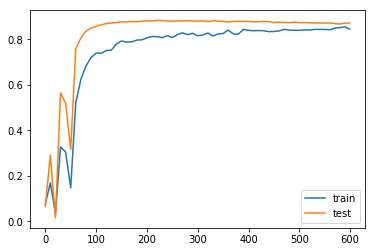

max(test_correct)= 0.8832


In [578]:
#v1 基本三层网络。每10次迭代训练 测试一次。
#v2 增加dropout，也就是中间层在训练的时候随机把50%设置为0，则剩下的部分信号要放大到原来的 1/0.5=2倍，才能保证layer2接收到相同强度的输入。
#v3 批量梯度下降法。每100个更新一次权重
#v4 使用tanh激活函数
#v5 加入卷积层；注意权重调整时，符号很重要

import numpy as np, sys
np.random.seed(1)

import time
start=time.time()


##tanh 激活函数
def tanh(x):
    return np.tanh(x)
## 其导数
def tanh2deriv(output):
    return 1-(output**2)

def softmax(x):
    temp=np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

# init
batch_size=128

alpha= 2  #0.005 * (batch_size/5)=0.1
iterations=600
pixels_per_image=784 #input一个图像,是28*28长度的向量
num_labels=10 #output是0-9标签的概率

#
input_rows=28
input_cols=28

kernel_rows=3
kernel_cols=3

num_kernels=16

#隐藏层节点数目
hidden_size=((input_rows-kernel_rows+1)*(input_cols-kernel_cols+1) ) * num_kernels;


#随机初始化权重, 矩阵行列维度分别由input和output确定
#weights_0_1=0.02*np.random.random((pixels_per_image, hidden_size))-0.01 #只有tanh激活函数喜欢更窄的初始化范围(-0.01,0.01)
kernels=0.02*np.random.random((kernel_rows*kernel_cols, num_kernels))-0.01 #建立核函数

weights_1_2=0.2*np.random.random((hidden_size, num_labels))-0.1 #范围(-0.1, 0.1)

## for plot
train_num=[]
train_correct=[]
test_correct=[]

## 从一批图片中选取子区域
def get_image_section(layer, row_from, row_to, col_from, col_to):
    sub_section=layer[:, row_from:row_to, col_from:col_to] #3维
    return sub_section.reshape(-1,1,row_to-row_from, col_to-col_from) #4维。新增的[1]维度只有1个维度，便于后续axis=1合并维度

for j in range(iterations):
    #error=0.0
    correct_cnt=0
    
    for i in range( int( len(images)/batch_size) ):
        batch_start = i*batch_size
        batch_end = (i+1)*batch_size
        #
        layer_0=images[batch_start:batch_end] #批量获取100个图片
        
        ############# begin 卷积层
        layer_0=layer_0.reshape(layer_0.shape[0], 28, 28);#还原成28*28像素图片
        # layer_0.shape
        
        ##对input层使用kernel 卷积核
        sects=list()
        for row_start in range( layer_0.shape[1]-kernel_rows+1):
            for col_start in range( layer_0.shape[2]-kernel_cols+1):
                sect=get_image_section(layer_0, row_start, row_start+kernel_rows, col_start, col_start+kernel_cols)
                sects.append(sect)
        
        expanded_input=np.concatenate(sects, axis=1)
        es=expanded_input.shape
        flattened_input=expanded_input.reshape(es[0]*es[1], -1) #行数是 图形*切片次数，切片次数=(in_row-kenel_r+1)*(in_col-k_c+1)
        #列数，其余2个维度row_to-row_from, col_to-col_from 的乘积个。其实就是 kernel_rows*kernel_cols个
        
        kernel_output=flattened_input.dot(kernels) # pic数*切片数 行， num_kernels 列。
        ############# end 卷积层
        
        layer_1=tanh(kernel_output.reshape(es[0],-1) ) #又变成一个image一行，切片数*num_kernels列
        
        dropout_mask=np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask*2
        
        layer_2=softmax( np.dot(layer_1, weights_1_2) ) #对outut使用softmax函数
        
        # log
        #error += np.sum( (layer_2 - labels[batch_start:batch_end])**2 )
        for k in range(batch_size):
            correct_cnt += int( np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]) )
        
        
        # 权重增量
        layer_2_delta = ( layer_2 - labels[batch_start:batch_end] ) / (batch_size * layer_2.shape[0]) ##//todo?
        
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask
        
        weights_1_2 -= alpha*layer_1.T.dot(layer_2_delta)
        #weights_0_1 -= alpha*layer_0.T.dot(layer_1_delta)
        
        #更新kernel 权重
        lld_reshape=layer_1_delta.reshape(kernel_output.shape)
        k_update=flattened_input.T.dot(lld_reshape)
        kernels += alpha*k_update
    
    # validation dataset
    if( j % 10==0 or j==(iterations-1) ):
        #error2=0.0
        correct_cnt2=0

        for i in range(len(test_images)):
            layer_0=test_images[i:i+1]
            layer_0=layer_0.reshape(layer_0.shape[0],28,28)
            #layer_0.shape
            
            sects=list()
            for row_start in range(layer_0.shape[1]-kernel_rows+1):
                for col_start in range(layer_0.shape[2]-kernel_cols+1):
                    sect=get_image_section(layer_0, row_start, row_start+kernel_rows,  col_start, col_start+kernel_cols)
                    sects.append(sect)
            
            expanded_input=np.concatenate(sects,axis=1)
            es=expanded_input.shape
            flattened_input=expanded_input.reshape(es[0]*es[1], -1)
            
            kernel_output=flattened_input.dot(kernels)
            layer_1=tanh(kernel_output.reshape(es[0], -1))
            
            layer_2=np.dot(layer_1, weights_1_2) #验证集输出不再使用softmax

            #error2 += np.sum( (layer_2 - test_labels[i:i+1])**2 )
            correct_cnt2 += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        
        #for plot later
        train_num.append(j)
        train_correct.append( correct_cnt/ float(len(images)) )
        test_correct.append( correct_cnt2/float(len(test_images)) )
        #validation reports
        sys.stdout.write("\n" + \
                         " I:"+str(j) + \

                         #" Train-Error:"+str( error/ float(len(images)))[0:6] +\
                         " Train-Correct:"+str( correct_cnt/float(len(images))) +\

                         #" Test-error:"+str(error2/float(len(test_images)))[0:5] +\
                         " Test-Acc:"+str( correct_cnt2/float(len(test_images))) +\
                         " \tTime: %0.2f" % (time.time()-start )  )
# 1071 seconds

#plot
import matplotlib.pyplot as plt

plt.plot(train_num, train_correct, label="train")
plt.plot(train_num, test_correct, label="test")

plt.legend() #默认的参数

plt.show()

#
print('max(test_correct)=',max(test_correct))

# 不同的参数值，验证集最好的结果
#num_kernels=16, I:250 Train-Correct:0.817 Test-Acc:0.8667 	Time: 772.29
#num_kernels=6,  I:349 Train-Correct:0.819 Test-Acc:0.8657 	Time: 834.56
#num_kernels=16  I:599 Train-Correct:0.855 Test-Acc:0.8616 	Time: 1835.91
#改变kernel行列值3为4， I:270 Train-Correct:0.834 Test-Acc:0.8704 	Time: 873.84
# 改变权重增量的符号后: I:220 Train-Correct:0.811 Test-Acc:0.8832 	Time: 704.14

> 特点： 验证集准确度比训练集还高！？

没看到哪里复用权重了，另外，更浪费时间了，但是验证集准确度没有比上一个版本v4提升！

In [579]:
for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_0=layer_0.reshape(layer_0.shape[0],28,28)
    print(i,layer_0.shape)
    
    if i>2:
        break;

0 (1, 28, 28)
1 (1, 28, 28)
2 (1, 28, 28)
3 (1, 28, 28)


In [580]:
kernels.shape

(9, 16)

In [581]:
kernels[1]

array([ 0.12332423,  0.4201637 ,  0.39053069, -0.39895787, -0.14722288,
        0.28898612, -0.34159409,  0.12118309,  1.36691744, -0.32461543,
        0.34723004, -0.11920052,  0.35598396,  0.58014353,  0.52113706,
        0.39349723])

In [582]:
layer_1.shape

(1, 10816)

In [583]:
layer_1[0,200:300]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00742772,  0.01615933,  0.00893642, -0.01054981, -0.00520976,
        0.00873155, -0.01248039,  0.00457638,  0.03334407, -0.00944258,
        0.01281926, -0.00545774,  0.00871625,  0.01627313,  0.0124158 ,
        0.01671341,  0.11503716,  0.24615399,  0.1397454 , -0.16547891,
       -0.07980429,  0.13563493, -0.19016662,  0.06978951,  0.47653659,
       -0.14647461,  0.19577801, -0.08185634,  0.13846848,  0.25

In [584]:
layer_2.shape

(1, 10)

In [585]:
layer_1[0,0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 自己的手写体数字识别

In [748]:
#Tips: 手写时，使用picpick截屏白色背景67*67，然后用6px黑色画笔写数字，然后缩放 图像大小 到28*28像素，保存为png。
# 要写到图片正中间，偏离中心可能识别出错。
#
#1.白底黑字的手写数字图片png, 缩放为 28*28 像素图片
#2.读入py，处理：取出rgb一个维度，(255-位点) /255，再转为 一行 784列
#3.使用卷积核和权重矩阵，获得对10个数字的打分，哪个打分高就是哪个数字。

from PIL import Image

def getImage2Matrix(PATH, isDebug=False):
    im = Image.open(PATH)
    if isDebug:
        plt.imshow(im)
        plt.show()

    data=im.getdata()
    data=np.array(data)
    #print(data.shape)

    data=np.reshape(data.T[0], (784, 1)) #只取rgb的一个维度
    
    input2 = ((255 - np.array(data, dtype=np.uint8)) / 255.0).reshape(1,-1)
    if isDebug:
        print(data.shape)
        print(input2.shape)
    return input2;
#

PATH ="my_num_pics/pic8.png"
img_mt=getImage2Matrix(PATH)
img_mt.shape

(1, 784)

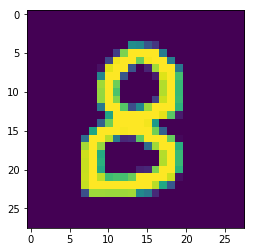

[[  0.44772882 -11.33360093  -0.67812046   4.88534478   2.09005839
    7.97590222  -5.73142496  -3.17445937  11.05604978   4.90894914]]


8

In [749]:
def sayNumberByMatrix(image_mt, isDebug=False): #(1,784)
    if isDebug:
        plt.imshow(image_mt.T.reshape(28,28))
        plt.show()
    
    layer_0=image_mt
    layer_0=layer_0.reshape(layer_0.shape[0],28,28)
    #layer_0.shape

    sects=list()
    for row_start in range(layer_0.shape[1]-kernel_rows+1):
        for col_start in range(layer_0.shape[2]-kernel_cols+1):
            sect=get_image_section(layer_0, row_start, row_start+kernel_rows,  col_start, col_start+kernel_cols)
            sects.append(sect)

    expanded_input=np.concatenate(sects,axis=1)
    es=expanded_input.shape
    flattened_input=expanded_input.reshape(es[0]*es[1], -1)

    kernel_output=flattened_input.dot(kernels)
    layer_1=tanh(kernel_output.reshape(es[0], -1))

    layer_2=np.dot(layer_1, weights_1_2) #验证集输出不再使用softmax
    if isDebug:
        print(layer_2)
    return np.argmax(layer_2)
#
sayNumberByMatrix(img_mt, True)

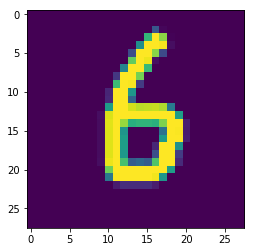

[[ -6.7280992   -5.30935326  -0.43153112  -3.83431114   2.46332546
    5.10997559  13.82445968 -16.74267288   3.52968671   1.68899997]]


6

In [751]:
sayNumberByMatrix(getImage2Matrix("my_num_pics/pic6.png"), True)

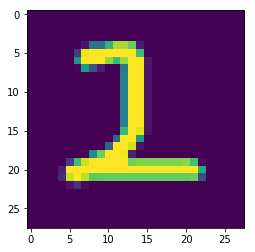

[[-10.3611183    9.20471884  18.65069943   3.594555   -18.62711593
    6.55298705   9.02274651 -21.73621892   3.49246192  -9.04678277]]


2

In [752]:
sayNumberByMatrix(getImage2Matrix("my_num_pics/pic2.png"), True)

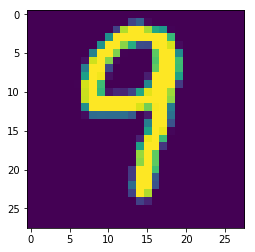

[[-14.56724112   4.0941195   -9.56724243   6.62726296   5.36608324
    2.12384677  -4.85413189   5.19594123   2.26911653   7.01589424]]


9

In [753]:
sayNumberByMatrix(getImage2Matrix("my_num_pics/pic9.png"), True)

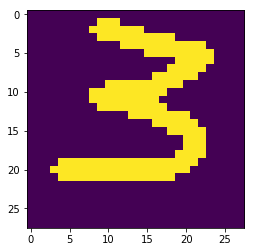

[[ -4.002751     6.10823945   8.53495689   6.63919305 -10.89910848
   13.18683964   3.96620666 -15.32112934   1.00986202 -12.47711437]]


5

In [754]:
sayNumberByMatrix(getImage2Matrix("my_num_pics/pic-.png"), True)

> 7（识别为3，2）和1(识别为6)的识别错误率很高。

## 检测验证集中错误率最高的都是哪些数字？

In [742]:
test_images.shape

(10000, 784)

In [743]:
test_labels.shape

(10000, 10)

In [760]:
arr_i=[]
predNum=[]
realNum=[]
for i in range(len(test_images)):
    if i>3:
        #break;
        pass;
    pred=sayNumberByMatrix(test_images[i:i+1])
    real=np.argmax(test_labels[i:i+1])
    if pred!=real:
        arr_i.append(i)
        predNum.append(pred)
        realNum.append(real)
#
print(len(arr_i), len(predNum), len(realNum) )

1293 1293 1293


In [766]:
import pandas as pd
t1=pd.DataFrame(realNum)
#比如要统计’label’这一列各个值出现的次数, 使用df_train.loc[:,'label'].value_counts()即可
t1.loc[:,0].value_counts()

3    201
5    182
9    161
8    161
2    134
4    129
7    128
6     89
1     69
0     39
Name: 0, dtype: int64

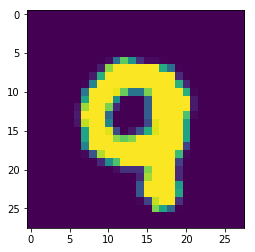

[[-6.62785431 -8.20438648  5.66707191 -6.54618612  7.15414411 -3.60516956
   2.3176627   9.52851355  1.30720549  8.13309437]]


7

In [770]:
# 随机抽查错误图片和预测结果
i=arr_i[300]
sayNumberByMatrix(test_images[i:i+1],True)

### 权重矩阵kernels的可视化

In [671]:
kernels.T.shape

(16, 9)

In [672]:
kns=kernels.T.reshape(-1,3,3)
kns.shape

(16, 3, 3)

In [673]:
kns[0]

array([[0.19111534, 0.12332423, 0.17321339],
       [0.24322457, 0.20168268, 0.20219871],
       [0.19588359, 0.22045693, 0.23676288]])

Kernel 0/16


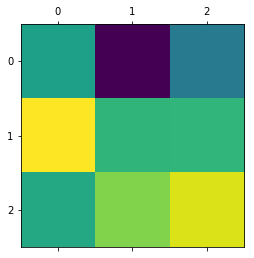

Kernel 1/16


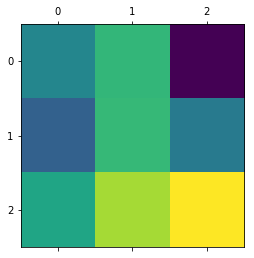

Kernel 2/16


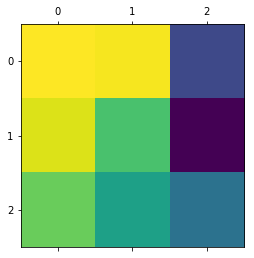

Kernel 3/16


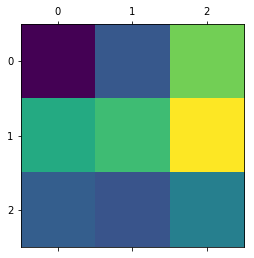

Kernel 4/16


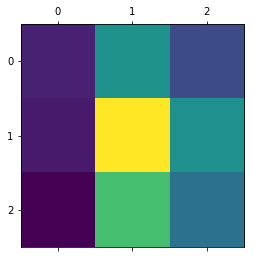

Kernel 5/16


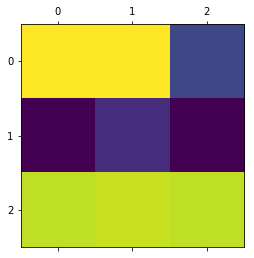

Kernel 6/16


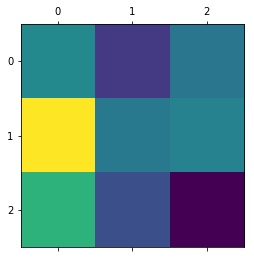

Kernel 7/16


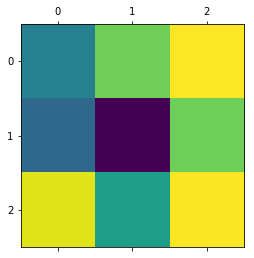

Kernel 8/16


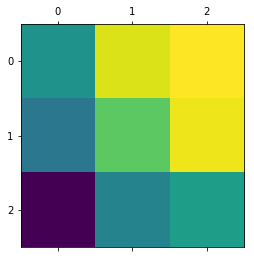

Kernel 9/16


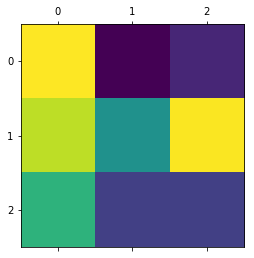

Kernel 10/16


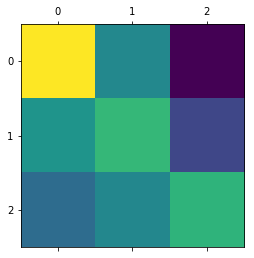

Kernel 11/16


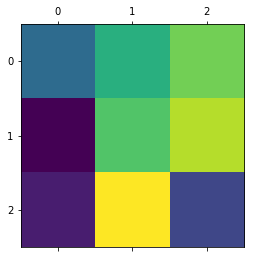

Kernel 12/16


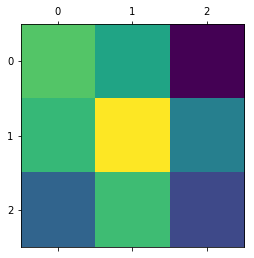

Kernel 13/16


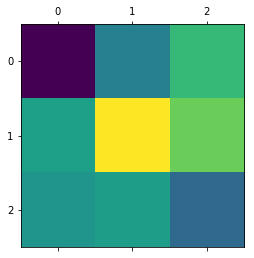

Kernel 14/16


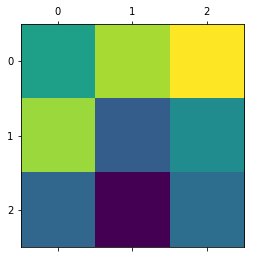

Kernel 15/16


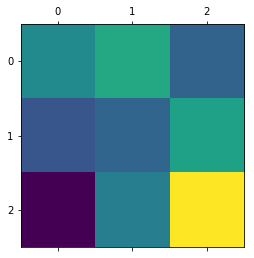

In [674]:
# 16个3x3卷积核
for i in range(len(kns)):
    print("Kernel %d/16" %i)
    plt.matshow(kns[i])
    plt.show()

### weights_1_2 权重矩阵

In [675]:
weights_1_2.T.shape #(10, 10816)

(10, 10816)

In [676]:
# 每一行对应一个输出
print(weights_1_2.T[0].shape)
weights_1_2.T[0]

(10816,)


array([-0.09108962, -0.04953485, -0.06864172, ...,  0.04498086,
       -0.08934054, -0.0429537 ])

To output number: 0
After kernel: 0 / 16


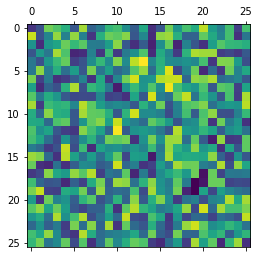

After kernel: 1 / 16


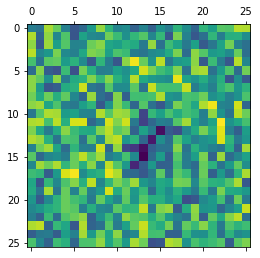

After kernel: 2 / 16


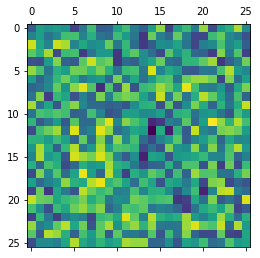

After kernel: 3 / 16


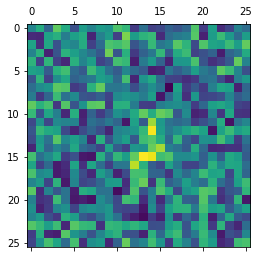

After kernel: 4 / 16


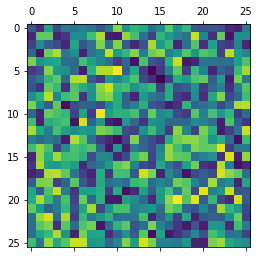

After kernel: 5 / 16


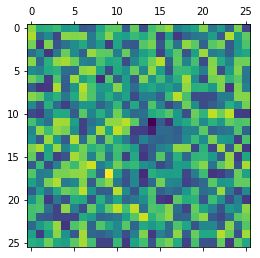

After kernel: 6 / 16


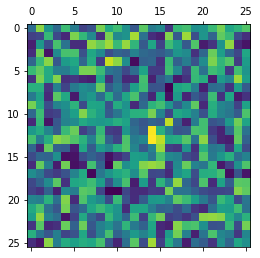

After kernel: 7 / 16


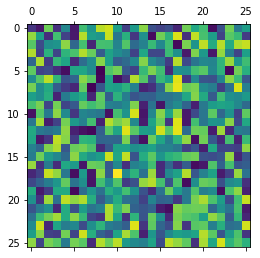

After kernel: 8 / 16


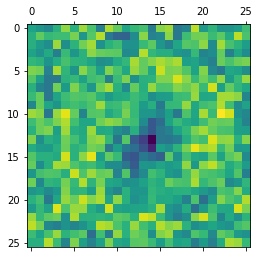

After kernel: 9 / 16


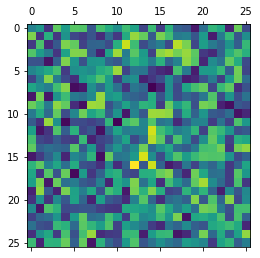

After kernel: 10 / 16


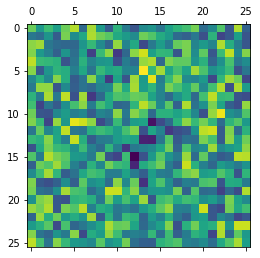

After kernel: 11 / 16


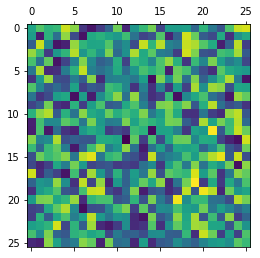

After kernel: 12 / 16


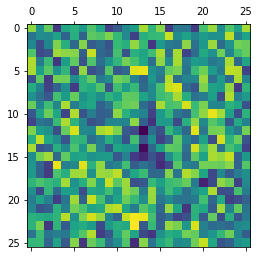

After kernel: 13 / 16


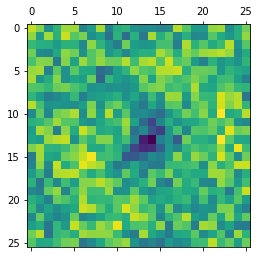

After kernel: 14 / 16


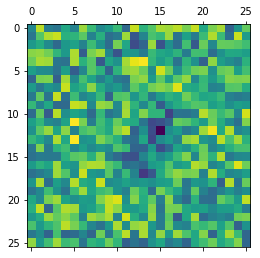

After kernel: 15 / 16


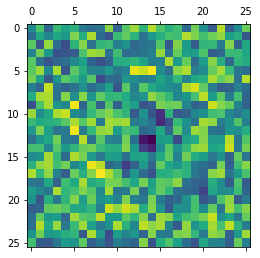

In [606]:
def drawWeightsByNumber(n):
    #对于0-9之间的矩阵
    print("To output number:",n)
    #取出第0行，每676（26*26）一个图像
    pics=weights_1_2.T[n].reshape(676,16).T
    pics.shape #(16, 676)

    #对每个layer1 到 ouput时，需要经过的16个图像
    for i in range(len(pics)):
        print("After kernel: %d / 16" % i)
        plt.matshow(pics[i].reshape(26,26))
        plt.show()
        
drawWeightsByNumber(0)